In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Ham(s, J_1, J_2):
    sn_1 = 0
    sn_2 = 0
    s_len = len(s)
    for i in range(s_len):
        sn_1 += s[i] * s[(i + 1)%s_len]
        sn_2 += s[i] * s[(i + 2)%s_len]
    return -J_1 * sn_1 / s_len  - J_2 * sn_2 / s_len

Text(0, 0.5, '$J_2$')

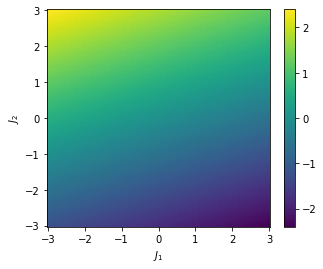

In [3]:
X_l = np.linspace(-3.0, 3.0, 100)
Y_l = np.linspace(-3.0, 3.0, 100)
X, Y = np.meshgrid(X_l, Y_l)

s = [1, 1, -1, -1, -1]
Z = Ham(s, X, Y)
fig = plt.figure(figsize=(5, 4))
plt.pcolormesh(X, Y, Z, shading='auto')
plt.colorbar()
plt.xlabel(r"$J_1$")
plt.ylabel(r"$J_2$")

In [4]:
def spin_configs(spin_count, unique=False):
    s = np.zeros((2**spin_count, spin_count), dtype=np.int)
    for spin_conf in range(2**spin_count):
        s[spin_conf] = np.full(spin_count, spin_conf)
        for i in range(spin_count):
            s[spin_conf][i] = s[spin_conf][i]/(2**(spin_count - i - 1))
    s = (s%2) * 2 - 1
    if(unique):
        s = s[1:-1]
        for sub_spin_count in range(2, spin_count):
            if(spin_count%sub_spin_count == 0):
                repeat_num = int(spin_count/sub_spin_count)
                s_sub = np.zeros((2**sub_spin_count, spin_count), dtype=np.int)
                for spin_conf in range(2**sub_spin_count):
                    s_sub[spin_conf] = np.full(spin_count, spin_conf)
                    for i in range(sub_spin_count):
                        s_sub[spin_conf][i] = s_sub[spin_conf][i]/(2**(sub_spin_count - i - 1))
                        for rep in range(1, repeat_num):
                            s_sub[spin_conf][rep*sub_spin_count + i] = s_sub[spin_conf][i]
                s_sub = s_sub[1:-1]
                s_sub = (s_sub%2) * 2 - 1
                for shift in range(sub_spin_count):
                    for sub in range(len(s_sub)):
                        s = s[~(s == np.roll(s_sub[sub], shift)).all(axis=1)]
        for shift in range(1, spin_count):
            sub = 0
            while sub < len(s):
                s = s[~(s == np.roll(s[sub], shift)).all(axis=1)]
                sub += 1
    return s

In [5]:
def minimised_arr(Arr_1, Arr_2):
    return np.multiply(Arr_1, np.greater(Arr_2, Arr_1)) + np.multiply(Arr_2, np.greater(Arr_1, Arr_2)) + np.multiply(Arr_1, np.multiply(~np.greater(Arr_1, Arr_2), ~np.greater(Arr_2, Arr_1)))

In [6]:
def Ham_min_spincount(spin_count, draw=False, unique=False):
    X_l = np.linspace(-3.0, 3.0, 100)
    Y_l = np.linspace(-3.0, 3.0, 100)
    X, Y = np.meshgrid(X_l, Y_l)
    Z_min = np.full(X.shape[0]*X.shape[1], 1e9)
    s = spin_configs(spin_count, unique=unique)
    for spin_conf in range(len(s)):
        #print(s[spin_conf])
        Z = Ham(s[spin_conf], X, Y)
        if(draw):
            fig = plt.figure(figsize=(5, 4))
            plt.pcolormesh(X, Y, Z, shading='auto')
            plt.colorbar()
            plt.title(str(s[spin_conf]))
            plt.xlabel(r"$J_1$")
            plt.ylabel(r"$J_2$")
        Z = Z.reshape(X.shape[0]*X.shape[1])
        Z_min = minimised_arr(Z_min, Z)
    return Z_min

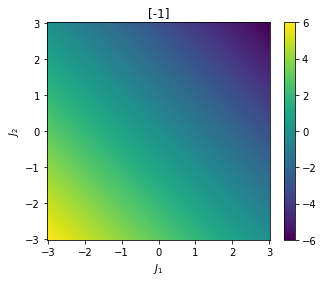

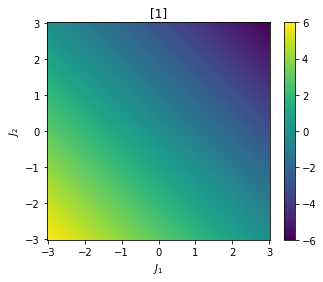

In [22]:
Z_min_1 = Ham_min_spincount(1, draw=True)

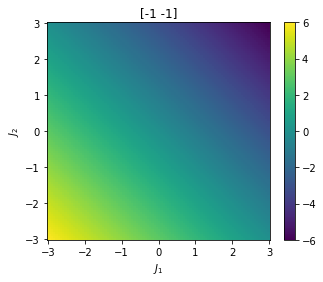

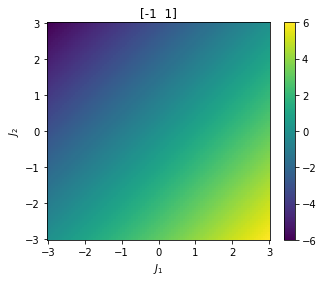

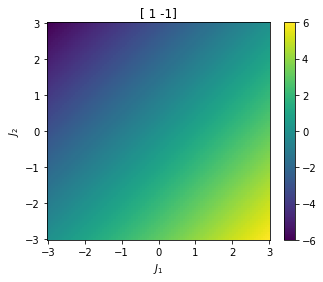

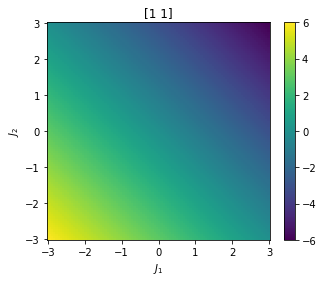

In [7]:
Z_min_2 = Ham_min_spincount(2, draw=True)

-6.0


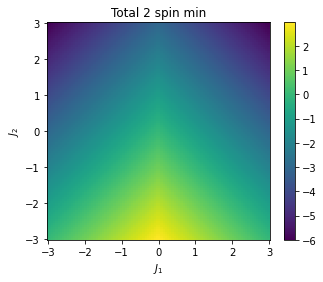

In [8]:
fig = plt.figure(figsize=(5, 4))
Z_min_2 = Z_min_2.reshape(X.shape)
plt.pcolormesh(X, Y, Z_min_2, shading='auto')
plt.colorbar()
plt.title("Total 2 spin min")
plt.xlabel(r"$J_1$")
plt.ylabel(r"$J_2$")
print(Z_min_2.min())

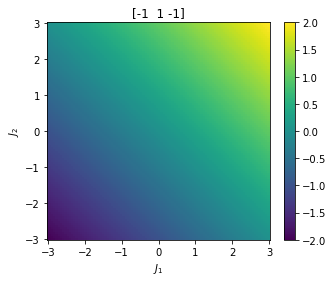

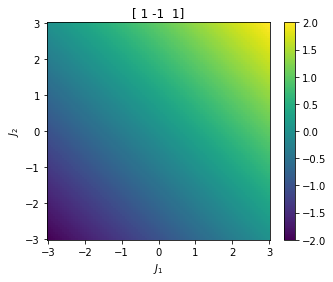

In [9]:
Z_min_3 = Ham_min_spincount(3, draw=True, unique=True)

In [10]:
fig = plt.figure(figsize=(5, 4))
Z_min_3 = Z_min_3.reshape(X.shape)
plt.pcolormesh(X, Y, Z_min_3, shading='auto')
plt.colorbar()
plt.title("Total 3 spin min")
plt.xlabel(r"$J_1$")
plt.ylabel(r"$J_2$")
print(Z_min_3.min())

-2.0


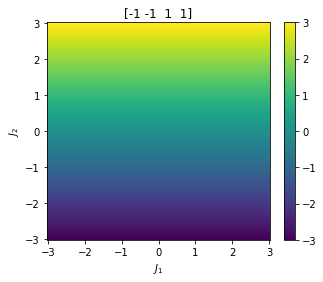

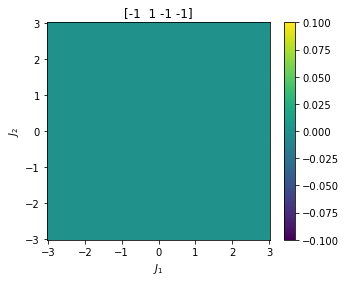

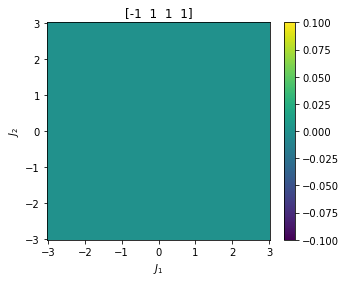

In [11]:
Z_min_4 = Ham_min_spincount(4, draw=True, unique=True)

-3.0


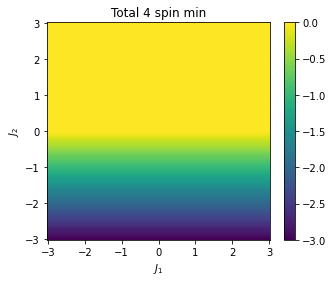

In [12]:
fig = plt.figure(figsize=(5, 4))
Z_min_4 = Z_min_4.reshape(X.shape)
plt.pcolormesh(X, Y, Z_min_4, shading='auto')
plt.colorbar()
plt.title("Total 4 spin min")
plt.xlabel(r"$J_1$")
plt.ylabel(r"$J_2$")
print(Z_min_4.min())

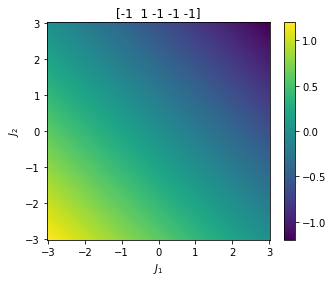

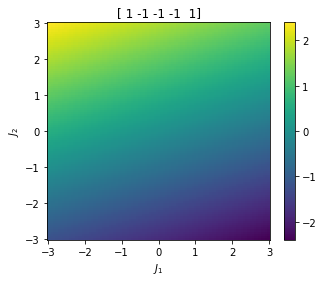

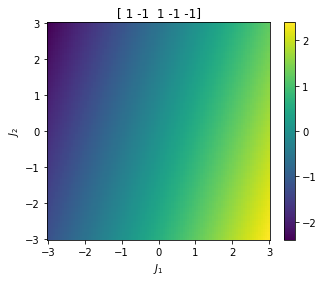

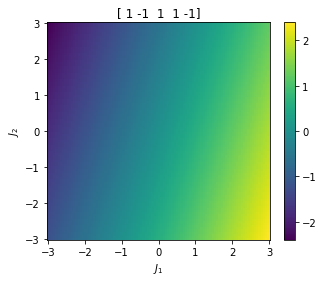

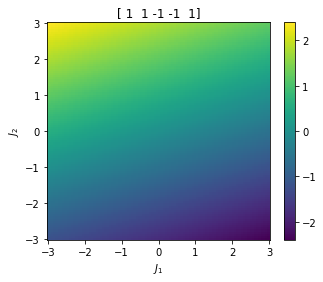

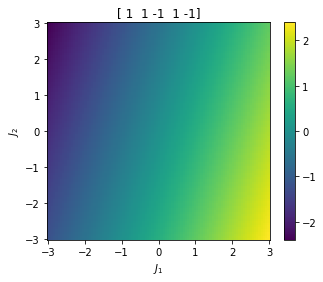

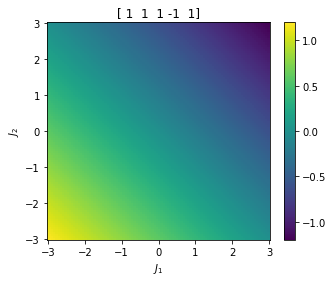

In [13]:
Z_min_5 = Ham_min_spincount(5, draw=True, unique=True)

-2.4


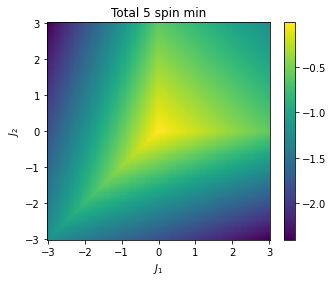

In [14]:
fig = plt.figure(figsize=(5, 4))
Z_min_5 = Z_min_5.reshape(X.shape)
plt.pcolormesh(X, Y, Z_min_5, shading='auto')
plt.colorbar()
plt.title("Total 5 spin min")
plt.xlabel(r"$J_1$")
plt.ylabel(r"$J_2$")
print(Z_min_5.min())

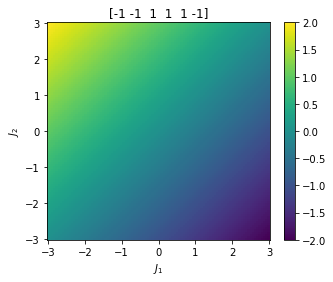

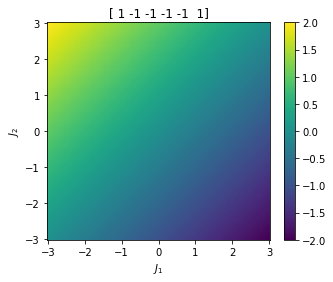

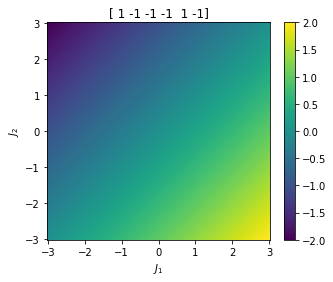

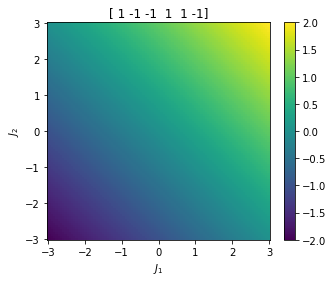

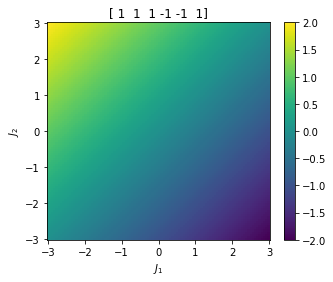

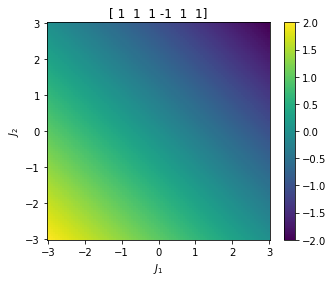

In [15]:
Z_min_6 = Ham_min_spincount(6, draw=True, unique=True)

-2.0


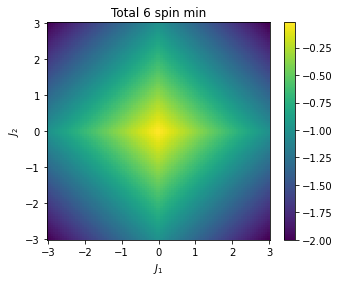

In [16]:
fig = plt.figure(figsize=(5, 4))
Z_min_6 = Z_min_6.reshape(X.shape)
plt.pcolormesh(X, Y, Z_min_6, shading='auto')
plt.colorbar()
plt.title("Total 6 spin min")
plt.xlabel(r"$J_1$")
plt.ylabel(r"$J_2$")
print(Z_min_6.min())

-6.0


Text(0, 0.5, '$J_2$')

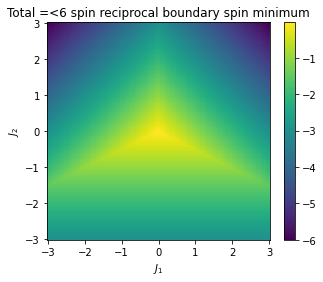

In [17]:
Z_min_arr = [Z_min_2, Z_min_3, Z_min_4, Z_min_5, Z_min_6]
Z_min_full = np.full(X.shape, 1e9)
for Z_min_s in Z_min_arr:
    Z_min_full = minimised_arr(Z_min_full, Z_min_s)

fig = plt.figure(figsize=(5, 4))
Z_min_full = Z_min_full.reshape(X.shape)
print(Z_min_full.min())
plt.pcolormesh(X, Y, Z_min_full, shading='auto')
plt.colorbar()
plt.title("Total =<6 spin reciprocal boundary spin minimum")
plt.xlabel(r"$J_1$")
plt.ylabel(r"$J_2$")

Begining spin_count =  2
Begining spin_count =  3
Begining spin_count =  4
Begining spin_count =  5
Begining spin_count =  6
Begining spin_count =  7
Begining spin_count =  8
Begining spin_count =  9
Begining spin_count =  10
Begining spin_count =  11
Begining spin_count =  12
Begining spin_count =  13
Begining spin_count =  14
Begining spin_count =  15
Begining spin_count =  16
Begining spin_count =  17
-6.0


Text(0, 0.5, '$J_2$')

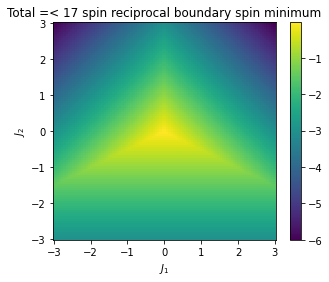

In [18]:
total_spin_count = 17
Z_min_full = np.full(X.shape[0]*X.shape[1], Ham_min_spincount(1, draw=False, unique=False))
Z_min_arr = np.full((total_spin_count, X.shape[0]*X.shape[1]), Z_min_full)
for spin_count in range(2, total_spin_count+1):
    print("Begining spin_count = ", spin_count)
    Z_min_arr[spin_count - 1] = Ham_min_spincount(spin_count, draw=False, unique=True)
    Z_min_full = minimised_arr(Z_min_full, Z_min_arr[spin_count - 3])
fig = plt.figure(figsize=(5, 4))
Z_min_full = Z_min_full.reshape(X.shape)
print(Z_min_full.min())
plt.pcolormesh(X, Y, Z_min_full, shading='auto')
plt.colorbar()
plt.title("Total =< " + str(total_spin_count) + " spin reciprocal boundary spin minimum")
plt.xlabel(r"$J_1$")
plt.ylabel(r"$J_2$")

4


Text(0, 0.5, '$J_2$')

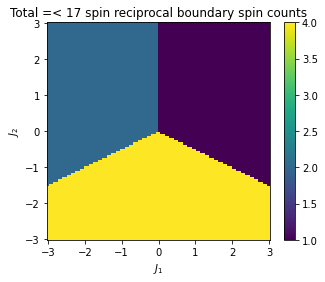

In [21]:
Z_min_full_test = Z_min_full.reshape(X.shape[0]*X.shape[1]).copy()
Z_min_spin_check = np.full(X.shape[0]*X.shape[1], 0)
Z_min_spin_mark = np.full(X.shape[0]*X.shape[1], 0)
spin_count = 0
while (sum(Z_min_spin_check) < len(Z_min_spin_check)) & (spin_count < len(Z_min_arr)):
    Z_min_spin_check = Z_min_spin_check + np.isclose(Z_min_full_test, Z_min_arr[spin_count], atol=1e-3)
    Z_min_spin_mark = Z_min_spin_mark + (spin_count + 1) * np.isclose(Z_min_full_test, Z_min_arr[spin_count], atol=1e-3) * (Z_min_spin_mark == 0)
    Z_min_spin_check[Z_min_spin_check > 1] = 1
    spin_count +=1
print(spin_count)
fig = plt.figure(figsize=(5, 4))
Z_plot = Z_min_spin_mark.reshape(X.shape)
plt.pcolormesh(X, Y, Z_plot, shading='auto')
plt.colorbar()
plt.title("Total =< " + str(total_spin_count) + " spin reciprocal boundary spin counts")
plt.xlabel(r"$J_1$")
plt.ylabel(r"$J_2$")